In [1]:
# import the required library modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
# define the functions
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

def predict(X, W):
    preds = sigmoid_activation(X.dot(W))

    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

In [3]:
# replace argparse stuff with hardcoded dict strings
args = {}

args["epochs"] = 100
args["alpha"] = 0.01

In [4]:
# create data and label blobs
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

print(X.shape,y.shape)

(1000, 2) (1000,)


In [5]:
y = y.reshape((y.shape[0], 1))
print(y.shape)

(1000, 1)


In [6]:
# bias trick
X = np.c_[X, np.ones(X.shape[0])]
print(X.shape)

(1000, 3)


In [7]:
print(X)

[[-3.75777913  4.5291416   1.        ]
 [-7.91575179 -3.61404891  1.        ]
 [ 2.88672576  5.64336681  1.        ]
 ...
 [-2.04803419  4.69042967  1.        ]
 [-1.86422702  4.22790859  1.        ]
 [-9.86565836 -5.06598889  1.        ]]


In [8]:
# split dataset into training and test data
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)
print(trainX,"\n",trainX.shape)

[[ -2.54825183   0.94912796   1.        ]
 [-12.62182064  -1.96446452   1.        ]
 [ -6.83458986  -1.53300622   1.        ]
 ...
 [  0.28076453   3.74799337   1.        ]
 [  0.08236863   6.01143818   1.        ]
 [ -1.9394284    4.32125315   1.        ]] 
 (500, 3)


In [9]:
# prepare weight matrix with random values
W = np.random.randn(X.shape[1], 1)
losses = []
print(W, "\n", W.shape)

[[0.29177481]
 [0.2413546 ]
 [0.55535023]] 
 (3, 1)


In [10]:
# training with 'gradient descent'
for epoch in np.arange(0, args["epochs"]):
    preds = sigmoid_activation(trainX.dot(W))
    error = preds - trainY
    loss = np.sum(error * 2)
    losses.append(loss)

    gradient = trainX.T.dot(error)
    W += -args["alpha"] * gradient
    
    # check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

[INFO] epoch=1, loss=-104.2870424
[INFO] epoch=5, loss=25.9740836
[INFO] epoch=10, loss=21.4481157
[INFO] epoch=15, loss=14.4784969
[INFO] epoch=20, loss=13.9983542
[INFO] epoch=25, loss=13.9662258
[INFO] epoch=30, loss=12.5954208
[INFO] epoch=35, loss=9.5386989
[INFO] epoch=40, loss=7.6252549
[INFO] epoch=45, loss=4.6904139
[INFO] epoch=50, loss=3.3790010
[INFO] epoch=55, loss=2.7152070
[INFO] epoch=60, loss=2.0848003
[INFO] epoch=65, loss=1.5424243
[INFO] epoch=70, loss=1.1831281
[INFO] epoch=75, loss=0.9596737
[INFO] epoch=80, loss=0.8147698
[INFO] epoch=85, loss=0.7149500
[INFO] epoch=90, loss=0.6423574
[INFO] epoch=95, loss=0.5871747
[INFO] epoch=100, loss=0.5437083


In [11]:
# print predictions and report
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



Text(0, 0.5, 'Loss')

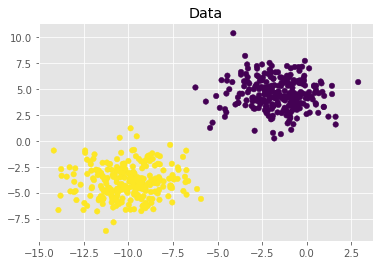

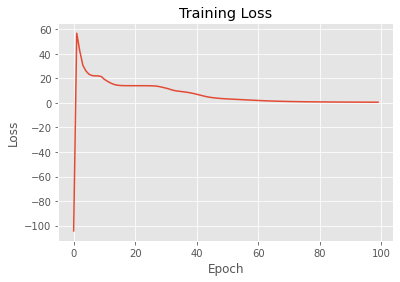

In [12]:
# plot the (testing) classification data 
plt.style.use("ggplot") 
plt.figure() 
plt.title("Data") 
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY, s=30)  

# construct a figure that plots the loss over time 
plt.style.use("ggplot") 
plt.figure() 
plt.plot(np.arange(0, args["epochs"]), losses) 
plt.title("Training Loss") 
plt.xlabel("Epoch") 
plt.ylabel("Loss")